In [18]:
import yfinance as yf


tesla = yf.Ticker("TSLA")
tesla_hist = tesla.history(period="max") 
tesla_hist.head()




,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
!pip install lxml

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text  # <- Como pide la consigna

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

df = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        df = pd.read_html(str(table))[0]
        break

if df is not None:
    df.columns = ['Date', 'Revenue']
    df = df[df['Revenue'] != '']
    df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True)
    df['Revenue'] = pd.to_numeric(df['Revenue'])
    print(df.tail(5))
else:
    print("❌ No se encontró la tabla con los ingresos de Tesla.")


          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


In [19]:
gamestop = yf.Ticker("GME")
gme_hist = gamestop.history(period="max")
gme_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")

tables = soup.find_all("table")


df1 = pd.DataFrame()

for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        df1 = pd.read_html(str(table))[0]
        break


if not df1.empty:
    df1.columns = ['Date', 'Revenue']
    df1 = df1[df1['Revenue'] != '']
    print(df1.tail(5))
else:
    print("No se encontró la tabla de 'GameStop Quarterly Revenue'.")




          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


No se encontró la tabla de 'Tesla Quarterly Revenue'.


KeyError: 'Date'

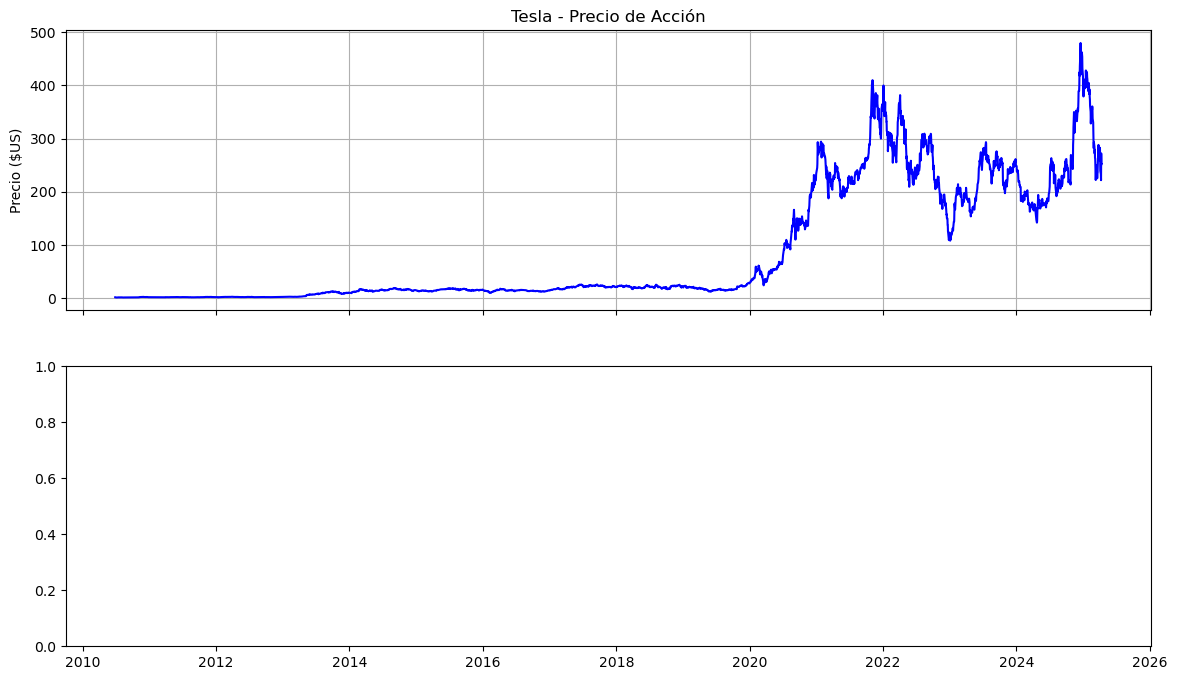

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Descargar datos históricos de Tesla
tsla = yf.Ticker("TSLA")
tsla_hist = tsla.history(period="max")

# Obtener la tabla de ingresos trimestrales de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
tables = soup.find_all("table")

df = pd.DataFrame()

for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        df = pd.read_html(str(table))[0]
        break

# Limpiar y preparar datos
if not df.empty:
    df.columns = ['Date', 'Revenue']
    df = df[df['Revenue'] != '']
    df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
else:
    print("No se encontró la tabla de 'Tesla Quarterly Revenue'.")

# Graficar en dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Precio de las acciones
ax1.plot(tsla_hist.index, tsla_hist['Close'], label='Precio de acción (cierre)', color='blue')
ax1.set_title('Tesla - Precio de Acción')
ax1.set_ylabel('Precio ($US)')
ax1.grid(True)

# Ingresos
ax2.plot(df['Date'], df['Revenue'], label='Ingresos', color='darkred')
ax2.set_title('Tesla - Ingresos Trimestrales')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Ingresos ($US)')
ax2.grid(True)

plt.tight_layout()
plt.show()



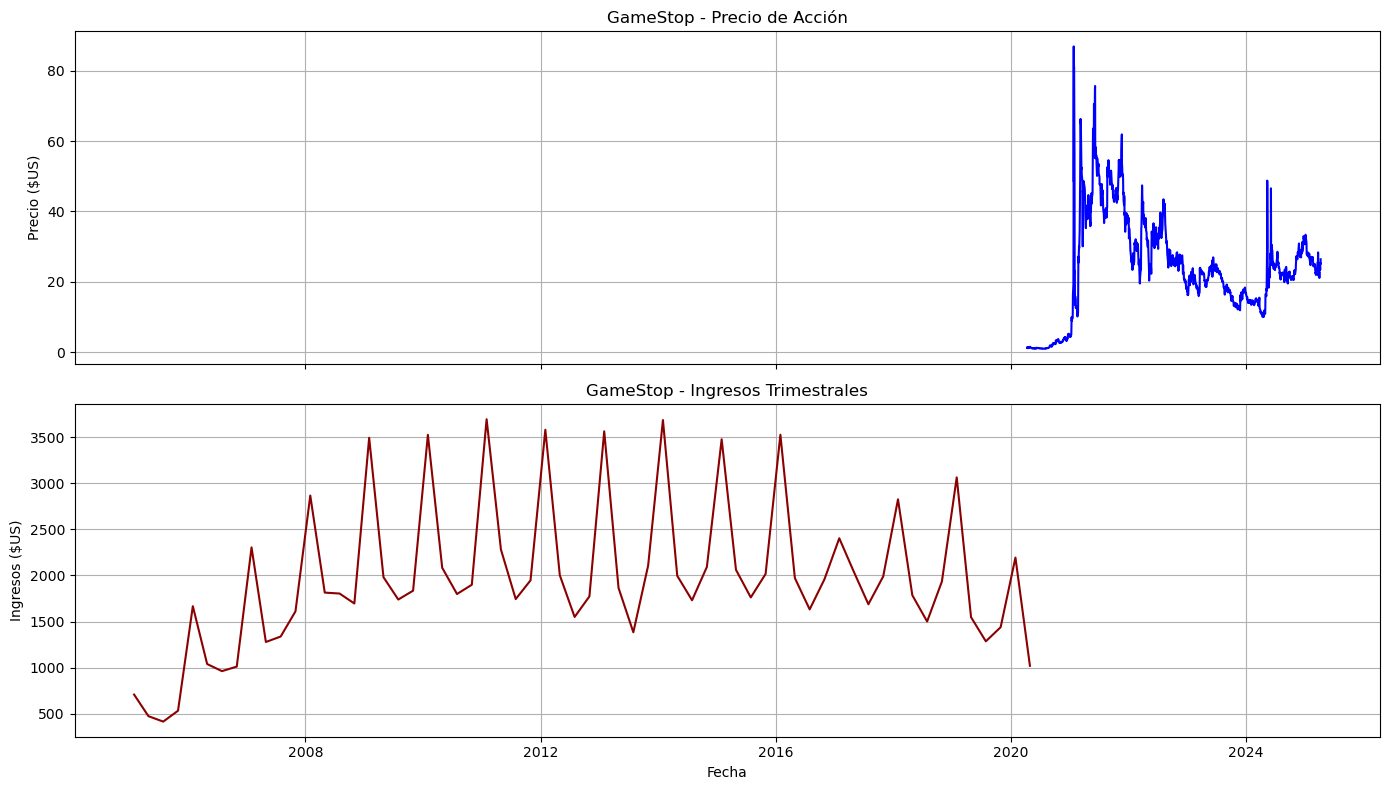

In [28]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Scraping de ingresos trimestrales de GameStop
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
tables = soup.find_all("table")

df1 = pd.DataFrame()

for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        df1 = pd.read_html(str(table))[0]
        break

if not df1.empty:
    df1.columns = ['Date', 'Revenue']
    df1 = df1[df1['Revenue'] != '']  
    df1['Date'] = pd.to_datetime(df1['Date'])  
    df1['Revenue'] = df1['Revenue'].replace('[\$,]', '', regex=True).astype(float)  
else:
    print("❌ No se encontró la tabla con los ingresos de GameStop.")

# Descargar historial de precios de GameStop (últimos 5 años)
gamestop = yf.Ticker("GME")
gme_hist = gamestop.history(period="5y")

# Crear dos subgráficos: uno para el precio, otro para ingresos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Precio de acción
ax1.plot(gme_hist.index, gme_hist['Close'], label='Precio de acción (cierre)', color='blue')
ax1.set_title('GameStop - Precio de Acción')
ax1.set_ylabel('Precio ($US)')
ax1.grid(True)

# Ingresos trimestrales
ax2.plot(df1['Date'], df1['Revenue'], label='Ingresos', color='darkred')
ax2.set_title('GameStop - Ingresos Trimestrales')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Ingresos ($US)')
ax2.grid(True)

plt.tight_layout()
plt.show()
